In [37]:
import numpy as np
%matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu, linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

from public_tests_a1 import *

tf.keras.backend.set_floatx('float64')
from assigment_utils import *

tf.autograph.set_verbosity(0)

In [38]:
X, y, x_ideal, y_ideal = gen_data(18, 2, 0.7)
print(f"X.shape {X.shape}, y.shape: {y.shape}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
                                                    random_state=1)
print(f"X_train.shape = {X_train.shape}, y_train.shape = {y_train.shape}")

X.shape (18,), y.shape: (18,)
X_train.shape = (12,), y_train.shape = (12,)


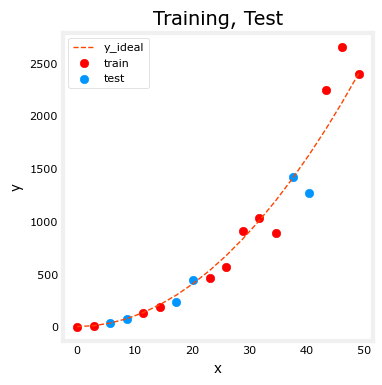

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color="orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test", fontsize=14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color="red", label="train")
ax.scatter(X_test, y_test, color=dlc["dlblue"], label="test")
ax.legend(loc='upper left')
plt.show()

In [40]:
def eval_mse(y, yhat):
    m = len(y)
    cost = np.sum((yhat - y)**2) / (2 * m)
    return cost

In [41]:
y_hat = np.array([2.4, 4.2])
y_tmp = np.array([2.3, 4.1])
eval_mse(y_hat, y_tmp)

# BEGIN UNIT TEST
test_eval_mse(eval_mse)   
# END UNIT TEST

 All tests passed.


In [42]:
degree = 10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)

yhat = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat)

print(f"training error {err_train:0.2f}, test error {err_test:0.2f}")

training error 58.01, test error 171215.01


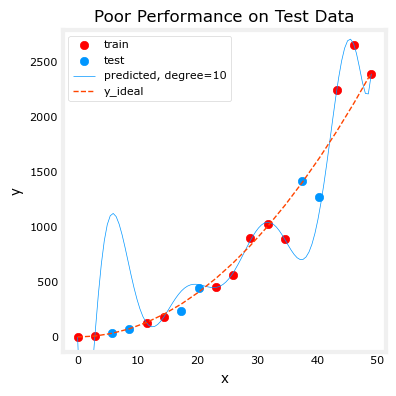

In [43]:
x = np.linspace(0, int(X.max()), 100)
y_pred = lmodel.predict(x).reshape(-1, 1)

plt_train_test(X_train, y_train, X_test, y_test, x, y_pred, x_ideal, y_ideal,
              degree)

In [44]:
X, y, x_ideal, y_ideal = gen_data(40, 5, 0.7)
print(f"X.shape = {X.shape}, y.shape = {y.shape}")

X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.40, 
                                           random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.50, 
                                             random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape = (40,), y.shape = (40,)
X_train.shape (24,) y_train.shape (24,)
X_cv.shape (8,) y_cv.shape (8,)
X_test.shape (8,) y_test.shape (8,)


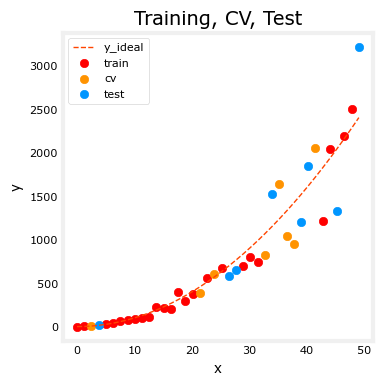

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color="orangered", label="y_ideal", lw=1)
ax.set_title("Training, CV, Test", fontsize=14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color="red", label="train")
ax.scatter(X_cv, y_cv, color=dlc["dlorange"], label="cv")
ax.scatter(X_test, y_test, color=dlc["dlblue"], label="test")
ax.legend(loc='upper left')
plt.show()

In [46]:
max_degree = 9
err_train = np.zeros(max_degree)
err_cv = np.zeros(max_degree)
x = np.linspace(0, int(X.max()), 100)
y_pred = np.zeros((100, max_degree))

for degree in range(max_degree):
    lmodel = lin_model(degree+1)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[degree] = lmodel.mse(y_train, yhat)
    
    yhat = lmodel.predict(X_cv)
    err_cv[degree] = lmodel.mse(y_cv, yhat)
    y_pred[:, degree] = lmodel.predict(x)
    
optimal_degree = np.argmin(err_cv) + 1

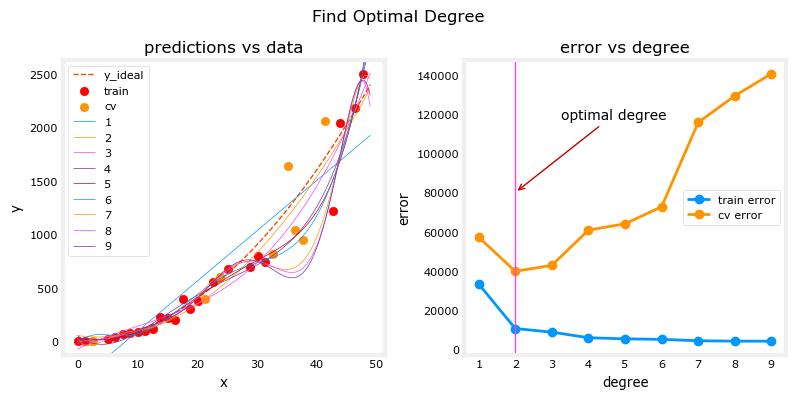

In [47]:
plt.close("all")
plt_optimal_degree(X_train, y_train, X_cv, y_cv, x, y_pred, x_ideal,
                  y_ideal, err_train, err_cv, optimal_degree, max_degree)

In [48]:
lambda_range = np.array([0.0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
num_steps = len(lambda_range)
degree = 10
err_train = np.zeros(num_steps)
err_cv = np.zeros(num_steps)
x = np.linspace(0, int(X.max()), 100)
y_pred = np.zeros((100, num_steps))

for i in range(num_steps):
    lambda_ = lambda_range[i]
    lmodel = lin_model(degree, regularization=True, lambda_ = lambda_)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[i] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[i] = lmodel.mse(y_cv, yhat)
    y_pred[:, i] = lmodel.predict(x)
    
optimal_reg_idx = np.argmin(err_cv)

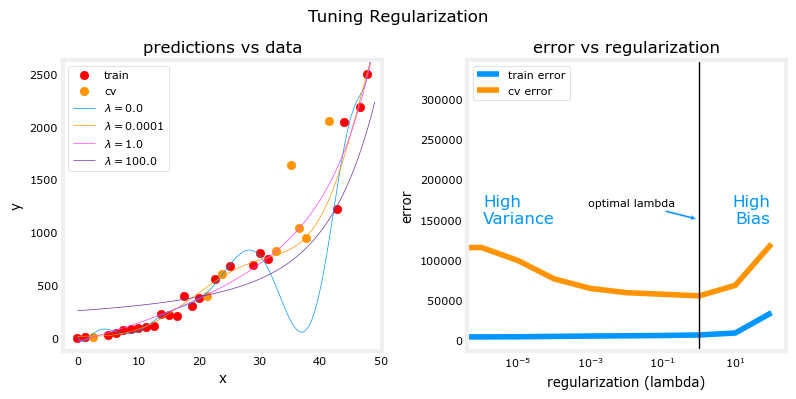

In [49]:
plt.close("all")
plt_tune_regularization(X_train, y_train, X_cv, y_cv, x, y_pred, err_train,
                       err_cv, optimal_reg_idx, lambda_range)

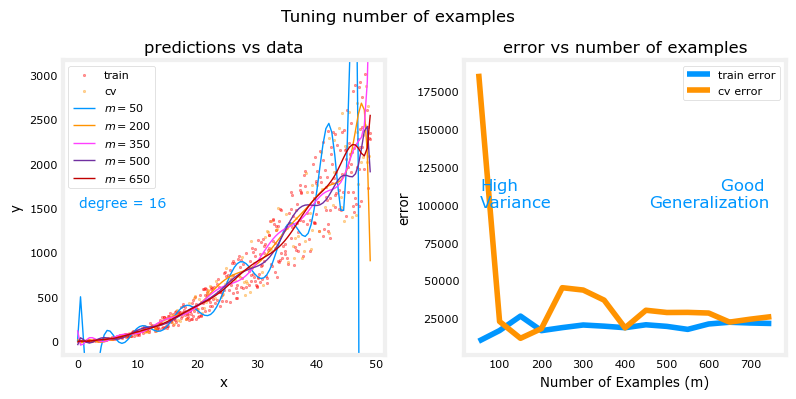

In [50]:
X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range, degree = tune_m()
plt_tune_m(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv,
          m_range, degree)

In [51]:
X, y, centers, classes, std = gen_blobs()

X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.50,
                                           random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.2,
                                             random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


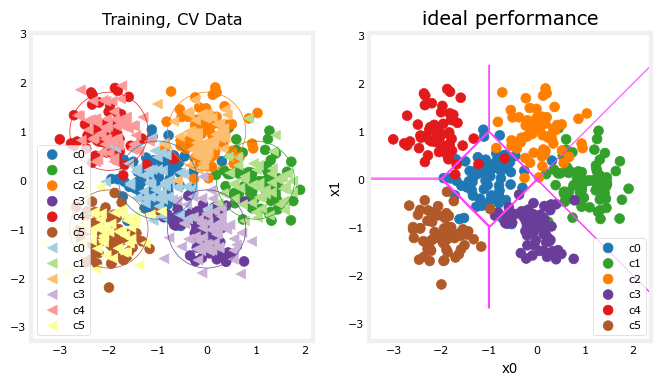

In [52]:
plt_train_eq_dist(X_train, y_train, classes, X_cv, y_cv, centers, std)

In [53]:
def eval_cat_err(y, yhat):
    m = len(y)
    err = np.sum(y != yhat) / m
    return err

In [54]:
y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.250" )

# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST
# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST

categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250
 All tests passed.
 All tests passed.


In [56]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.layers.Dense(120, activation="relu"),
        tf.keras.layers.Dense(40, activation="relu"),
        tf.keras.layers.Dense(6, activation="linear")
    ], name = "Complex"
)
model.compile(
    loss = SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
)

In [57]:
model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000


InvalidArgumentError: Cannot assign a device for operation Complex/dense_15/MatMul/ReadVariableOp: Could not satisfy explicit device specification '' because the node {{colocation_node Complex/dense_15/MatMul/ReadVariableOp}} was colocated with a group of nodes that required incompatible device '/job:localhost/replica:0/task:0/device:GPU:0'. All available devices [/job:localhost/replica:0/task:0/device:CPU:0, /job:localhost/replica:0/task:0/device:GPU:0]. 
Colocation Debug Info:
Colocation group had the following types and supported devices: 
Root Member(assigned_device_name_index_=2 requested_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' assigned_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' resource_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' supported_device_types_=[CPU] possible_devices_=[]
ReadVariableOp: GPU CPU 
ResourceApplyAdam: CPU 
_Arg: GPU CPU 

Colocation members, user-requested devices, and framework assigned devices, if any:
  complex_dense_15_matmul_readvariableop_resource (_Arg)  framework assigned device=/job:localhost/replica:0/task:0/device:GPU:0
  adam_adam_update_resourceapplyadam_m (_Arg)  framework assigned device=/job:localhost/replica:0/task:0/device:GPU:0
  adam_adam_update_resourceapplyadam_v (_Arg)  framework assigned device=/job:localhost/replica:0/task:0/device:GPU:0
  Complex/dense_15/MatMul/ReadVariableOp (ReadVariableOp) 
  Adam/Adam/update/ResourceApplyAdam (ResourceApplyAdam) /job:localhost/replica:0/task:0/device:GPU:0

	 [[{{node Complex/dense_15/MatMul/ReadVariableOp}}]] [Op:__inference_train_function_2653]

In [32]:
X_train.shape, y_train.shape

((400, 2), (400,))